In [1]:
import cv2
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector

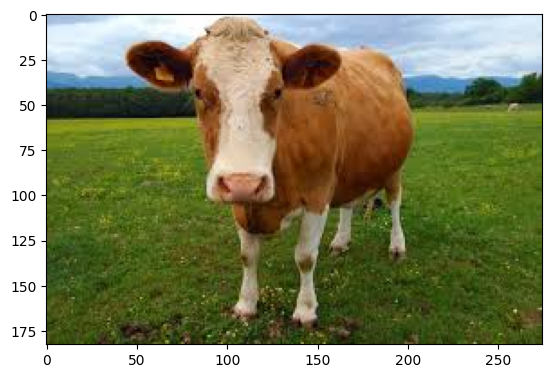

In [2]:
def line_select_callback(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    rect = plt.Rectangle((min(x1,x2), min(y1,y2)), abs(x1-x2), abs(y1-y2), 
                         fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    fig.canvas.draw()

# Load the image
img = plt.imread(r'\\10.17.97.73\kiemen-lab-data\Yu Shen\Benjamin Wen\download.jpg')

# Create the figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create the RectangleSelector
rs = RectangleSelector(ax, line_select_callback,
                       useblit=True,
                       button=[1],  # Left mouse button only
                       minspanx=5, minspany=5,
                       spancoords='pixels',
                       interactive=True)

plt.show()

In [3]:

# Function to handle mouse events
def draw_rectangle(event, x, y, flags, params):
    global ix, iy, drawing, img, mask, save_rectangle
    
    if event == cv2.EVENT_RBUTTONDOWN:
        drawing = True
        save_rectangle = False
        ix, iy = x, y
        mask = np.zeros_like(img)  # Create a mask of zeros with the same shape as img
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            mask = np.zeros_like(img)  # Reset mask to zeros
            mid_x = (ix + x) // 2
            mid_y = (iy + y) // 2
            width = abs(ix - x)
            height = abs(iy - y)
            edge_len = min(width, height)
            top_left_x = int(mid_x - edge_len // 2)
            top_left_y = int(mid_y - edge_len // 2)
            bottom_right_x = int(mid_x + edge_len // 2)
            bottom_right_y = int(mid_y + edge_len // 2)
            cv2.rectangle(mask, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)  # Draw rectangle on mask
            cv2.rectangle(mask, (ix, iy), (x, y), (0, 255, 0), 2)  # Draw rectangle on mask
            result = cv2.addWeighted(img, 1, mask, 0.5, 0)  # Blend original image with mask
            cv2.imshow('image', result)
            
    elif event == cv2.EVENT_RBUTTONUP:
        if drawing:
            drawing = False
            mask2 = np.zeros_like(img)  # Reset mask to zeros
            cv2.rectangle(mask2, (ix, iy), (x, y), (255, 0, 0), 2)  # Draw rectangle on mask
            result = cv2.addWeighted(img, 1, mask2, 0.5, 0)  # Blend original image with mask
            mid_x = (ix + x) // 2
            mid_y = (iy + y) // 2
            width = abs(ix - x)
            height = abs(iy - y)
            edge_len = min(width, height)
            top_left_x = int(mid_x - edge_len // 2)
            top_left_y = int(mid_y - edge_len // 2)
            bottom_right_x = int(mid_x + edge_len // 2)
            bottom_right_y = int(mid_y + edge_len // 2)
            if save_rectangle:
                cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)  # Draw final rectangle on img
            cv2.imshow('image', img)

# Load an image
img = cv2.imread(r'\\10.17.97.73\kiemen-lab-data\Yu Shen\Benjamin Wen\download.jpg')
cv2.imshow('image', img)

# Initialize variables
drawing = False
ix, iy = -1, -1
mask = np.zeros_like(img)  # Initialize mask

# Set the mouse callback function
cv2.setMouseCallback('image', draw_rectangle)

# Wait for ESC key to exit
while True:
    key = cv2.waitKey(20) & 0xFF
    if cv2.waitKey(20) & 0xFF == 27:
        break
    elif key == ord('x'):
        save_rectangle = True  # Change color to blue

cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np

# Initialize global variables
drawing = False
ix, iy = -1, -1
mask = None  # Initialize mask
save_rectangle = False

zoom_factor = 1.0
pan_x, pan_y = 0, 0
cursor_x, cursor_y = 0, 0
mouseRGB_last_x = 0
mouseRGB_last_y = 0

# Load an image
img = cv2.imread(r'\\10.17.97.73\kiemen-lab-data\Yu Shen\Benjamin Wen\download.jpg')
cv2.imshow('image', img)
display_img = None

def mouseRGB(event, x, y, flags, param):
    global zoom_factor, pan_x, pan_y, cursor_x, cursor_y, drawing, save_rectangle, ix, iy, mask, mouseRGB_last_x, mouseRGB_last_y, display_img

    if event == cv2.EVENT_LBUTTONDOWN:  # Check mouse left button down condition
        mouseRGB_last_x, mouseRGB_last_y = x, y

    elif event == cv2.EVENT_RBUTTONDOWN:  # Check mouse right button down condition
        drawing = True
        save_rectangle = False
        ix, iy = x, y
        mask = np.zeros_like(img)  # Create a mask of zeros with the same shape as img

    elif event == cv2.EVENT_MOUSEWHEEL:
        cursor_x, cursor_y = x, y
        if flags > 0:
            zoom_factor += 0.1
        else:
            zoom_factor -= 0.1
        zoom_factor = max(0.1, zoom_factor)
        update_display_img('x',0,0,0,0)

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            pan_x += x - mouseRGB_last_x
            pan_y += y - mouseRGB_last_y
            mouseRGB_last_x, mouseRGB_last_y = x, y
            update_display_img('x',0,0,0,0)
        elif flags & cv2.EVENT_FLAG_RBUTTON:
            if drawing:
                # Only update pan_x and pan_y if drawing is True
                mask = np.zeros_like(img)  # Reset mask to zeros
                mid_x = (ix + x) // 2
                mid_y = (iy + y) // 2
                width = abs(ix - x)
                height = abs(iy - y)
                edge_len = min(width, height)
                top_left_x = int(mid_x - edge_len // 2)
                top_left_y = int(mid_y - edge_len // 2)
                bottom_right_x = int(mid_x + edge_len // 2)
                bottom_right_y = int(mid_y + edge_len // 2)
                cv2.rectangle(mask, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)  # Draw rectangle on mask
                cv2.rectangle(mask, (ix, iy), (x, y), (0, 255, 0), 2)  # Draw rectangle on mask
                result = cv2.addWeighted(display_img, 1, mask, 0.5, 0)  # Blend original image with mask
                cv2.imshow('image', result)

    elif event == cv2.EVENT_RBUTTONUP:
        if drawing:
            drawing = False
            mask2 = np.zeros_like(img)  # Reset mask to zeros
            cv2.rectangle(mask2, (ix, iy), (x, y), (255, 0, 0), 2)  # Draw rectangle on mask
            #result = cv2.addWeighted(img, 1, mask2, 0.5, 0)  # Blend original image with mask
            mid_x = (ix + x) // 2
            mid_y = (iy + y) // 2
            width = abs(ix - x)
            height = abs(iy - y)
            edge_len = min(width, height)
            top_left_x = int(mid_x - edge_len // 2)
            top_left_y = int(mid_y - edge_len // 2)
            bottom_right_x = int(mid_x + edge_len // 2)
            bottom_right_y = int(mid_y + edge_len // 2)
            if save_rectangle:
                cv2.rectangle(display_img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)  # Draw final rectangle on img
                update_display_img('w', top_left_x, top_left_y, bottom_right_x, bottom_right_y)
            else:
                update_display_img('x', top_left_x, top_left_y, bottom_right_x, bottom_right_y)

def update_display_img(mode, top_left_x, top_left_y, bottom_right_x, bottom_right_y):
    global display_img, zoom_factor, pan_x, pan_y, cursor_x, cursor_y
    if mode == 'w':
        cv2.rectangle(display_img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)  # Draw final rectangle on img
    h, w = img.shape[:2]
    # Center of the zoom
    center_x, center_y = cursor_x, cursor_y
    M = np.float32([[zoom_factor, 0, center_x - center_x * zoom_factor + pan_x],
                    [0, zoom_factor, center_y - center_y * zoom_factor + pan_y]])
    display_img = cv2.warpAffine(img, M, (w, h))
    cv2.imshow('image', display_img)

cv2.setMouseCallback('image', mouseRGB)

# Wait for ESC key to exit
while True:
    key = cv2.waitKey(20) & 0xFF
    if key == 27:  # ESC key
        break
    elif key == ord('x'):
        save_rectangle = True  # Change color to blue

cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np
import math

# Initialize global variables
drawing = False
ix, iy = -1, -1
mask = None  # Initialize mask
save_rectangle = False

zoom_factor = 1.0
pan_x, pan_y = 0, 0
cursor_x, cursor_y = 0, 0
mouseRGB_last_x = 0
mouseRGB_last_y = 0

# Load an image
img_full = cv2.imread(r'\\10.17.97.73\kiemen-lab-data\Yu Shen\T1D\6521_aab\svs_files\10x_v2\chop\6521-003_IHCB.tif')
height, width = img_full.shape[:2]
downscale_factor = 0.25
print(height, width)
img = cv2.resize(img_full, (int(width * downscale_factor), int(height * downscale_factor)), interpolation=cv2.INTER_LINEAR)
cv2.imshow('image', img)
display_img = None
coordinates = []
def mouseRGB(event, x, y, flags, param):
    global zoom_factor, pan_x, pan_y, cursor_x, cursor_y, drawing, save_rectangle, ix, iy, mask, mouseRGB_last_x, mouseRGB_last_y, display_img

    if event == cv2.EVENT_LBUTTONDOWN:  # Check mouse left button down condition
        mouseRGB_last_x, mouseRGB_last_y = x, y

    elif event == cv2.EVENT_RBUTTONDOWN:  # Check mouse right button down condition
        drawing = True
        save_rectangle = False
        ix, iy = x, y
        mask = np.zeros_like(img)  # Create a mask of zeros with the same shape as img

    elif event == cv2.EVENT_MOUSEWHEEL:
        cursor_x, cursor_y = x, y
        if flags > 0:
            zoom_factor += 0.1
        else:
            zoom_factor -= 0.1
        zoom_factor = max(0.1, zoom_factor)
        update_display_img()

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            pan_x += x - mouseRGB_last_x
            pan_y += y - mouseRGB_last_y
            mouseRGB_last_x, mouseRGB_last_y = x, y
            update_display_img()
        elif flags & cv2.EVENT_FLAG_RBUTTON:
            if drawing:
                # Only update pan_x and pan_y if drawing is True
                mask = np.zeros_like(img)  # Reset mask to zeros
                mid_x = (ix + x) // 2
                mid_y = (iy + y) // 2
                width = abs(ix - x)
                height = abs(iy - y)
                edge_len = min(width, height)
                top_left_x = int(mid_x - edge_len // 2)
                top_left_y = int(mid_y - edge_len // 2)
                bottom_right_x = int(mid_x + edge_len // 2)
                bottom_right_y = int(mid_y + edge_len // 2)
                cv2.rectangle(mask, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)  # Draw rectangle on mask
                cv2.rectangle(mask, (ix, iy), (x, y), (0, 255, 0), 2)  # Draw rectangle on mask
                result = cv2.addWeighted(display_img, 1, mask, 0.5, 0)  # Blend original image with mask
                cv2.imshow('image', result)

    elif event == cv2.EVENT_RBUTTONUP:
        if drawing:
            
            
            drawing = False
            mask2 = np.zeros_like(img)  # Reset mask to zeros
            cv2.rectangle(mask2, (ix, iy), (x, y), (255, 0, 0), 2)  # Draw rectangle on mask
            #result = cv2.addWeighted(img, 1, mask2, 0.5, 0)  # Blend original image with mask
            mid_x = (ix + x) // 2
            mid_y = (iy + y) // 2
            width = abs(ix - x)
            height = abs(iy - y)
            edge_len = min(width, height)
            top_left_x = int(mid_x - edge_len // 2)
            top_left_y = int(mid_y - edge_len // 2)
            bottom_right_x = int(mid_x + edge_len // 2)
            bottom_right_y = int(mid_y + edge_len // 2)
            if save_rectangle:
                M = np.float32([[zoom_factor, 0, cursor_x - cursor_x * zoom_factor + pan_x],
                    [0, zoom_factor, cursor_y - cursor_y * zoom_factor + pan_y]])
                # Convert display coordinates to original image coordinates
                inv_M = cv2.invertAffineTransform(M)
                orig_top_left = cv2.transform(np.array([[[top_left_x, top_left_y]]]), inv_M)[0][0]
                orig_bottom_right = cv2.transform(np.array([[[bottom_right_x, bottom_right_y]]]), inv_M)[0][0]
                
                # Draw rectangle on original image
                cv2.rectangle(img, 
                              (int(orig_top_left[0]), int(orig_top_left[1])), 
                              (int(orig_bottom_right[0]), int(orig_bottom_right[1])), 
                              (0, 0, 255), 2)
                coordinates.append([int(orig_top_left[0]), int(orig_top_left[1]), int(orig_bottom_right[0]), int(orig_bottom_right[1])]) #top x, top y, bot x, bot y
                update_display_img()


def update_display_img():
    global display_img, zoom_factor, pan_x, pan_y, cursor_x, cursor_y
    h, w = img.shape[:2]
    # Center of the zoom
    center_x, center_y = cursor_x, cursor_y
    M = np.float32([[zoom_factor, 0, center_x - center_x * zoom_factor + pan_x],
                    [0, zoom_factor, center_y - center_y * zoom_factor + pan_y]])
    display_img = cv2.warpAffine(img, M, (w, h))
    cv2.imshow('image', display_img)

    

cv2.setMouseCallback('image', mouseRGB)

# Wait for ESC key to exit
while True:
    key = cv2.waitKey(20) & 0xFF
    if key == 27:  # ESC key
        break
    elif key == ord('x'):
        save_rectangle = True  # Change color to blue

cv2.destroyAllWindows()

17233 21049


KeyboardInterrupt: 

In [2]:
stain_colors = ["brown", "blue", "red"]
hsv_values = [[] for _ in stain_colors]  # List to store HSV values for each color
hsv_index = 0
def mouseHSV(event, x, y, flags, param):
    global hsv_values, hsv_index

    if event == cv2.EVENT_LBUTTONDOWN:  # Check mouse left button down condition
        colorsB = display_img[y, x, 0]
        colorsG = display_img[y, x, 1]
        colorsR = display_img[y, x, 2]
        hsv_value = np.uint8([[[colorsB, colorsG, colorsR]]])
        hsv = cv2.cvtColor(hsv_value, cv2.COLOR_BGR2HSV)
        hsv = hsv[0][0]
        print("Left Click - HSV :", hsv)
        print("Coordinates of pixel: X: ", x, "Y: ", y)

    elif event == cv2.EVENT_RBUTTONDOWN:  # Check mouse right button down condition
        colorsB = display_img[y, x, 0]
        colorsG = display_img[y, x, 1]
        colorsR = display_img[y, x, 2]
        hsv_value = np.uint8([[[colorsB, colorsG, colorsR]]])
        hsv = cv2.cvtColor(hsv_value, cv2.COLOR_BGR2HSV)
        hsv = hsv[0][0]
        print("Right Click - HSV :", hsv)
        print("Coordinates of pixel: X: ", x, "Y: ", y)
        # Append HSV value to the list for the specified index
        hsv_values[hsv_index].append(hsv.tolist())
def concatenate_images(images, rows, cols):
    """
    Concatenate multiple images of the same size into a grid.
    :param images: List of images to concatenate
    :param rows: Number of rows in the grid
    :param cols: Number of columns in the grid
    :return: Concatenated image
    """
    assert len(images) <= rows * cols, "Number of images is greater than grid size"
    
    # Ensure all images are the same size
    assert all(img.shape == images[0].shape for img in images), "All images must have the same dimensions"

    # Create rows of images
    rows_of_images = [cv2.hconcat(images[i:i+cols]) for i in range(0, len(images), cols)]
    
    # Concatenate rows vertically
    return cv2.vconcat(rows_of_images)

def set_hsv_index(value):
    global hsv_index
    try:
        hsv_index = int(value)
        if 0 <= hsv_index < len(stain_colors):
            print(f"HSV index set to: {hsv_index} ({stain_colors[hsv_index]})")
        else:
            print(f"Invalid index. Please enter a number between 0 and {len(stain_colors) - 1}.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

print(coordinates)
num_imgs = len(coordinates)
x_grid = int(math.sqrt(num_imgs))
if num_imgs % x_grid == 0:
    y_grid = x_grid
else: 
    y_grid = x_grid + 1
images = []
# Ask the user to input the HSV index
input_value = input("Enter a number for HSV index (0 for brown, 1 for blue, 2 for red): ")
set_hsv_index(input_value)



for coord in coordinates:
    print(f"Cropping coordinates: {coord}")
    cropped_image = img_full[int(coord[1]/downscale_factor):int(coord[3]/downscale_factor), int(coord[0]/downscale_factor):int(coord[2]/downscale_factor)]
    if cropped_image.size == 0:
        print(f"Warning: Cropped image is empty for coordinates: {coord}")
        continue
    print(cropped_image.shape)
    downsized_cropped_image = cv2.resize(cropped_image, (512, 512), interpolation=cv2.INTER_LINEAR)
    images.append(downsized_cropped_image)

if images:
    result = concatenate_images(images, y_grid, x_grid)
    cv2.namedWindow('mouseHSV', cv2.WINDOW_NORMAL)
    cv2.setMouseCallback('mouseHSV', mouseHSV)

    while True:
        cv2.imshow('mouseHSV', result)
        key = cv2.waitKey(20) & 0xFF
        if key == 27:  # ESC key to break
            break
        elif key == ord('x'):  # Press 'x' key to break the for loop
            break
        elif key == ord('c'):  # Press 'c' key to change HSV index
            # Ask the user to input the HSV index
            input_value = input("Enter a number for HSV index (0 for brown, 1 for blue, 2 for red): ")
            set_hsv_index(input_value)
else:
    print("No images to concatenate.")
    
# Initialize lists to store max and min values for each color category
max_values_list = []
min_values_list = []
# Calculate max and min values separately for each color category
for i in hsv_values:  # Iterating over each color category
    max_values = np.amax(i, axis=0).tolist()  # Convert to list for better readability
    min_values = np.amin(i, axis=0).tolist()  # Convert to list for better readability
    max_values_list.append(max_values)
    min_values_list.append(min_values)

print("Max values for each color category:", max_values_list)
print("Min values for each color category:", min_values_list)

[[3755, 1219, 3993, 1457], [4156, 1309, 4346, 1499], [3309, 1564, 3477, 1732], [3196, 1812, 3394, 2010], [3540, 1862, 3756, 2078], [3918, 1747, 4098, 1927], [4247, 1952, 4407, 2112], [4132, 2195, 4326, 2389], [3558, 2114, 3734, 2290]]
HSV index set to: 0 (brown)
Cropping coordinates: [3755, 1219, 3993, 1457]
(952, 952, 3)
Cropping coordinates: [4156, 1309, 4346, 1499]
(760, 760, 3)
Cropping coordinates: [3309, 1564, 3477, 1732]
(672, 672, 3)
Cropping coordinates: [3196, 1812, 3394, 2010]
(792, 792, 3)
Cropping coordinates: [3540, 1862, 3756, 2078]
(864, 864, 3)
Cropping coordinates: [3918, 1747, 4098, 1927]
(720, 720, 3)
Cropping coordinates: [4247, 1952, 4407, 2112]
(640, 640, 3)
Cropping coordinates: [4132, 2195, 4326, 2389]
(776, 776, 3)
Cropping coordinates: [3558, 2114, 3734, 2290]
(704, 704, 3)
Left Click - HSV : [110  17 223]
Coordinates of pixel: X:  1125 Y:  1152
Right Click - HSV : [110  17 223]
Coordinates of pixel: X:  1125 Y:  1152
Right Click - HSV : [115  26 214]
Coordin